In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

import datetime as dt
import mplfinance as mpf

import time

import os
from os import listdir
from os.path import isfile, join

import statsmodels.api as sm
import seaborn as sns

from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [2]:
#Some Defatult Values
PATH = "C:/Users/dietd/Untitled Folder/Python for Finance/Financial Data/Stock Data/"
S_YEAR = 2017
S_MONTH = 1
S_DAY = 3
S_DATE_STR = f"{S_YEAR}-{S_MONTH}-{S_DAY}"
S_DATE_DATETIME = dt.datetime(S_YEAR,S_MONTH, S_DAY)

E_YEAR = 2021
E_MONTH = 8
E_DAY = 19
E_DATE_STR = f"{E_YEAR}-{E_MONTH}-{E_DAY}"
E_DATE_DATETIME = dt.datetime(E_YEAR,E_MONTH, E_DAY)


In [3]:
stocks_not_downloaded = []
missing_stocks = []

In [4]:
files = [x for x in listdir(PATH) if isfile(join(PATH, x))]
tickers = [os.path.splitext(x)[0] for x in files]

tickers.sort()
len(tickers)

2674

In [5]:
#save stocks to csv
def save_to_csv_from_yahoo(ticker, syear, smonth, sday, eyear, emonth, eday):
    start = dt.datetime(syear, smonth, sday)
    end = dt.datetime(eyear, emonth, eday)

    try:
        print("Get Data for :", ticker)
        df = yf.download(ticker, start=start, end=end)['Adj Close']
        time.sleep(0)
        df.to_csv('C:/Users/dietd/Untitled Folder/Python for Finance/Financial Data/Stock Data Updated/' + ticker + '.csv')

    except Exception as ex:
        stocks_not_downloaded.append(ticker)
        print("Could not download data for: "+ticker)

#function that returns df from csv
def get_df_from_csv(folder, ticker):
    try:
        df = pd.read_csv(folder + ticker + '.csv', index_col='Date', parse_dates=True)

    except FileNotFoundError:
        print("File Does Not Exist")

    else:
        return df


def update_stock_data(ticker):
    up_folder = 'C:/Users/dietd/Untitled Folder/Python for Finance/Financial Data/Stock Data Updated/'

    stock_folder = PATH

    update_df = get_df_from_csv(up_folder, ticker)
    update_df

    original_df = get_df_from_csv(stock_folder, ticker)

    #drop unnamed column
    original_df.drop(original_df.columns[original_df.columns.str.contains('unnamed', case = False)], axis=1, inplace=True)

    #drop daily return column
    original_df = original_df.drop('Daily_Return', axis=1)

    join_df = pd.concat([original_df, update_df])

    return join_df

In [6]:
for x in range(len(tickers)):
    print('Working on ', tickers[x])
    save_to_csv_from_yahoo(tickers[x], 2021, 8, 20, 2021, 9, 10)

print('FINISHED')

Working on  A
Get Data for : A
[*********************100%***********************]  1 of 1 completed
Working on  AA
Get Data for : AA
[*********************100%***********************]  1 of 1 completed
Working on  AAL
Get Data for : AAL
[*********************100%***********************]  1 of 1 completed
Working on  AAME
Get Data for : AAME
[*********************100%***********************]  1 of 1 completed
Working on  AAOI
Get Data for : AAOI
[*********************100%***********************]  1 of 1 completed
Working on  AAON
Get Data for : AAON
[*********************100%***********************]  1 of 1 completed
Working on  AAP
Get Data for : AAP
[*********************100%***********************]  1 of 1 completed
Working on  AAPL
Get Data for : AAPL
[*********************100%***********************]  1 of 1 completed
Working on  AAT
Get Data for : AAT
[*********************100%***********************]  1 of 1 completed
Working on  ABBV
Get Data for : ABBV
[*********************100


1 Failed download:
['BBBY']: Exception('%ticker%: No data found, symbol may be delisted')



Working on  BBCP
Get Data for : BBCP
[*********************100%***********************]  1 of 1 completed
Working on  BBGI
Get Data for : BBGI
[*********************100%***********************]  1 of 1 completed
Working on  BBSI
Get Data for : BBSI
[*********************100%***********************]  1 of 1 completed
Working on  BBW
Get Data for : BBW
[*********************100%***********************]  1 of 1 completed
Working on  BBY
Get Data for : BBY
[*********************100%***********************]  1 of 1 completed
Working on  BC
Get Data for : BC
[*********************100%***********************]  1 of 1 completed
Working on  BCBP
Get Data for : BCBP
[*********************100%***********************]  1 of 1 completed
Working on  BCC
Get Data for : BCC
[*********************100%***********************]  1 of 1 completed
Working on  BCLI
Get Data for : BCLI
[*********************100%***********************]  1 of 1 completed
Working on  BCO
Get Data for : BCO
[*******************


1 Failed download:
['JNCE']: Exception('%ticker%: No data found, symbol may be delisted')



Working on  JNJ
Get Data for : JNJ
[*********************100%***********************]  1 of 1 completed
Working on  JNPR
Get Data for : JNPR
[*********************100%***********************]  1 of 1 completed
Working on  JOB
Get Data for : JOB
[*********************100%***********************]  1 of 1 completed
Working on  JOE
Get Data for : JOE
[*********************100%***********************]  1 of 1 completed
Working on  JOUT
Get Data for : JOUT
[*********************100%***********************]  1 of 1 completed
Working on  JPM
Get Data for : JPM
[*********************100%***********************]  1 of 1 completed
Working on  JRVR
Get Data for : JRVR
[*********************100%***********************]  1 of 1 completed
Working on  JVA
Get Data for : JVA
[*********************100%***********************]  1 of 1 completed
Working on  JWN
Get Data for : JWN
[*********************100%***********************]  1 of 1 completed
Working on  JYNT
Get Data for : JYNT
[*******************


1 Failed download:
['MOBL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-08-20 00:00:00 -> 2021-09-10 00:00:00)')



Working on  MOD
Get Data for : MOD
[*********************100%***********************]  1 of 1 completed
Working on  MODN
Get Data for : MODN
[*********************100%***********************]  1 of 1 completed
Working on  MOFG
Get Data for : MOFG
[*********************100%***********************]  1 of 1 completed
Working on  MOH
Get Data for : MOH
[*********************100%***********************]  1 of 1 completed
Working on  MORN
Get Data for : MORN
[*********************100%***********************]  1 of 1 completed
Working on  MOS
Get Data for : MOS
[*********************100%***********************]  1 of 1 completed
Working on  MOTS
Get Data for : MOTS
[*********************100%***********************]  1 of 1 completed
Working on  MOV
Get Data for : MOV
[*********************100%***********************]  1 of 1 completed
Working on  MPAA
Get Data for : MPAA
[*********************100%***********************]  1 of 1 completed
Working on  MPB
Get Data for : MPB
[*****************


1 Failed download:
['VNTR']: Exception('%ticker%: No data found, symbol may be delisted')



Working on  VOXX
Get Data for : VOXX
[*********************100%***********************]  1 of 1 completed
Working on  VOYA
Get Data for : VOYA
[*********************100%***********************]  1 of 1 completed
Working on  VPG
Get Data for : VPG
[*********************100%***********************]  1 of 1 completed
Working on  VRA
Get Data for : VRA
[*********************100%***********************]  1 of 1 completed
Working on  VRAY
Get Data for : VRAY
[*********************100%***********************]  1 of 1 completed
Working on  VREX
Get Data for : VREX
[*********************100%***********************]  1 of 1 completed
Working on  VRNS
Get Data for : VRNS
[*********************100%***********************]  1 of 1 completed
Working on  VRNT
Get Data for : VRNT
[*********************100%***********************]  1 of 1 completed
Working on  VRRM
Get Data for : VRRM
[*********************100%***********************]  1 of 1 completed
Working on  VRSK
Get Data for : VRSK
[***********

In [7]:
print(stocks_not_downloaded)

[]


In [9]:
def save_dataframe_to_csv(df, folder, ticker):
    df.to_csv(folder + ticker + '.csv')


def update_stocks(stock_folder):
    for x in tickers:
        try:
            print('Working on ', x)
            new_df = update_stock_data(x)
            save_dataframe_to_csv(new_df, stock_folder, x)

        except Exception as ex:
            print(ex) #prints the error type

In [10]:
update_stocks(PATH) #update all stocks

Working on  A
Working on  AA
Working on  AAL
Working on  AAME
Working on  AAOI
Working on  AAON
Working on  AAP
Working on  AAPL
Working on  AAT
Working on  ABBV
Working on  ABC
Working on  ABCB
Working on  ABEO
Working on  ABG
Working on  ABIO
Working on  ABM
Working on  ABMD
Working on  ABR
Working on  ABT
Working on  AC
Working on  ACA
Working on  ACAD
Working on  ACCO
Working on  ACER
Working on  ACGL
Working on  ACHC
Working on  ACHV
Working on  ACIW
Working on  ACLS
Working on  ACM
Working on  ACMR
Working on  ACN
Working on  ACNB
Working on  ACOR
Working on  ACRE
Working on  ACRS
Working on  ACRX
Working on  ACTG
Working on  ACU
Working on  ADBE
Working on  ADC
Working on  ADES
Working on  ADI
Working on  ADM
Working on  ADMA
Working on  ADMP
Working on  ADNT
Working on  ADP
Working on  ADSK
Working on  ADT
Working on  ADTN
Working on  ADUS
Working on  ADVM
Working on  ADXS
Working on  AE
Working on  AEE
Working on  AEHR
Working on  AEIS
Working on  AEL
Working on  AEMD
Working 

In [11]:
def add_daily_return_to_df(df, ticker):
    df['daily_return']=(df['Adj Close'] / df['Adj Close'].shift(1)) - 1

    df.to_csv(PATH + ticker + '.csv')

    return df

In [13]:
#Update daily returns
for x in tickers:
    try:
        print('Working on ', x)
        new_df = get_df_from_csv(PATH, x)
        new_df = add_daily_return_to_df(new_df, x)
        save_dataframe_to_csv(new_df, PATH, x)

    except Exception as ex:
        print(ex)

Working on  A
Working on  AA
Working on  AAL
Working on  AAME
Working on  AAOI
Working on  AAON
Working on  AAP
Working on  AAPL
Working on  AAT
Working on  ABBV
Working on  ABC
Working on  ABCB
Working on  ABEO
Working on  ABG
Working on  ABIO
Working on  ABM
Working on  ABMD
Working on  ABR
Working on  ABT
Working on  AC
Working on  ACA
Working on  ACAD
Working on  ACCO
Working on  ACER
Working on  ACGL
Working on  ACHC
Working on  ACHV
Working on  ACIW
Working on  ACLS
Working on  ACM
Working on  ACMR
Working on  ACN
Working on  ACNB
Working on  ACOR
Working on  ACRE
Working on  ACRS
Working on  ACRX
Working on  ACTG
Working on  ACU
Working on  ADBE
Working on  ADC
Working on  ADES
Working on  ADI
Working on  ADM
Working on  ADMA
Working on  ADMP
Working on  ADNT
Working on  ADP
Working on  ADSK
Working on  ADT
Working on  ADTN
Working on  ADUS
Working on  ADVM
Working on  ADXS
Working on  AE
Working on  AEE
Working on  AEHR
Working on  AEIS
Working on  AEL
Working on  AEMD
Working 

In [19]:
def calc_projected_roi(ticker):
    a_df = get_df_from_csv(PATH, ticker)

    a_df = a_df.asfreq('d') #change frequency to day
    a_df.index
    a_df = a_df.fillna(method='ffill') #fill missing values

    #Delete unnamed column
    a_df.drop(a_df.columns[a_df.columns.str.contains('unnamed', case = False)], axis = 1, inplace= True)

    #Delete daily_return column
    a_df = a_df.drop(['daily_return'], axis=1)

    #Figure out optimal lags which will be 1 or 2 for this data set
    lags = ar_select_order(a_df, maxlag=30)

    #Create model
    model = AutoReg(a_df['Adj Close'], lags.ar_lags)
    model_fit = model.fit()

    #print('Length : ', len(a_df))
    train_df = a_df.iloc[50:round(0.8*len(a_df))]
    test_df = a_df.iloc[round(0.8*len(a_df)):]

    train_model = AutoReg(a_df['Adj Close'], 500).fit(cov_type="HC0")

    start = len(train_df)
    end = len(train_df)+len(test_df)-1

    prediction = train_model.predict(start=start, end=end, dynamic=True)

    #Predict 60 days  into the future
    forecast = train_model.predict(start=end, end=end+60, dynamic=True)

    s_price = forecast.head(1).iloc[0]

    e_price = forecast.iloc[-1]

    return (e_price-s_price) / s_price

In [20]:
def get_project_rois():
    ticker = []
    roi = []

    for x in tickers:
        print("Working on ", x)
        try: 
            the_roi = calc_projected_roi(x)
        except Exception as ex:
            print(ex)
            print("Stock Data Corrupted")
        else:
            ticker.append(x)
            print("Projected ROI: ", the_roi)
            roi.append(the_roi)
        
    return pd.DataFrame({'Ticker':ticker, 'Projected ROI': roi})

In [21]:
proj_roi_df = get_project_rois()

display(proj_roi_df)

Working on  A
Projected ROI:  0.17262284184598842
Working on  AA
Projected ROI:  0.20489399497334257
Working on  AAL
Projected ROI:  -0.17404029021170356
Working on  AAME
Projected ROI:  -0.30914960946609765
Working on  AAOI
Projected ROI:  0.12889498922604
Working on  AAON
Projected ROI:  0.09402408021371628
Working on  AAP
Projected ROI:  -0.08962731943892636
Working on  AAPL
Projected ROI:  0.06890165780787727
Working on  AAT
Projected ROI:  0.1843315291887519
Working on  ABBV
Projected ROI:  -0.056622326605392126
Working on  ABC
Projected ROI:  0.03585901946598764
Working on  ABCB
Projected ROI:  -0.08305327006837905
Working on  ABEO
Projected ROI:  -0.09510023847352068
Working on  ABG
Projected ROI:  -0.20770806117394974
Working on  ABIO
Projected ROI:  0.5625979963325963
Working on  ABM
Projected ROI:  0.13281704719316537
Working on  ABMD
Projected ROI:  0.06552605323353251
Working on  ABR
Projected ROI:  -0.005411060583265746
Working on  ABT
Projected ROI:  0.016174946187689544


,Ticker,Projected ROI
0,A,0.172623
1,AA,0.204894
2,AAL,-0.174040
3,AAME,-0.309150
4,AAOI,0.128895
...,...,...
2668,ZTS,0.015644
2669,ZUMZ,-0.174614
2670,ZUO,-0.016371
2671,ZYNE,-0.032538


In [27]:
best_proj_roi_df = proj_roi_df.sort_values(by=['Projected ROI'], ascending=False)[0:5]
display(best_proj_roi_df)

,Ticker,Projected ROI
2651,XXII,17.711195
468,CEI,7.516514
587,CPSH,6.991181
2494,VAPO,5.365287
2589,WKHS,3.210677


In [41]:
def calc_projected_roi_plot(ticker):
    a_df = get_df_from_csv(PATH, ticker)

    a_df = a_df.asfreq('d') #change frequency to day
    a_df.index
    a_df = a_df.fillna(method='ffill') #fill missing values

    #Delete unnamed column
    a_df.drop(a_df.columns[a_df.columns.str.contains('unnamed', case = False)], axis = 1, inplace= True)

    #Delete daily_return column
    a_df = a_df.drop(['daily_return'], axis=1)

    sns.set_style('darkgrid')
    pd.plotting.register_matplotlib_converters()
    sns.mpl.rc('figure', figsize=(19,13))

    fig, ax = plt.subplots()

    #Figure out optimal lags which will be 1 or 2 for this data set
    lags = ar_select_order(a_df, maxlag=30)

    #Create model
    model = AutoReg(a_df['Adj Close'], lags.ar_lags)
    model_fit = model.fit()

    #print('Length : ', len(a_df))
    train_df = a_df.iloc[50:round(0.8*len(a_df))]
    test_df = a_df.iloc[round(0.8*len(a_df)):]

    train_model = AutoReg(a_df['Adj Close'], 500).fit(cov_type="HC0")

    start = len(train_df)
    end = len(train_df)+len(test_df)-1

    prediction = train_model.predict(start=start, end=end, dynamic=True)

    ax = test_df.plot(ax=ax, label='Training data')
    ax = prediction.plot(ax=ax, label='Projected')

    #Predict 60 days  into the future
    forecast = train_model.predict(start=end, end=end+60, dynamic=True)

    ax = forecast.plot(ax=ax, label='Forecast')
    ax.legend()

    s_price = forecast.head(1).iloc[0]

    e_price = forecast.iloc[-1]

    return (e_price-s_price) / s_price

Working on:  XXII
Working on:  CEI
Working on:  CPSH
Working on:  VAPO
Working on:  WKHS


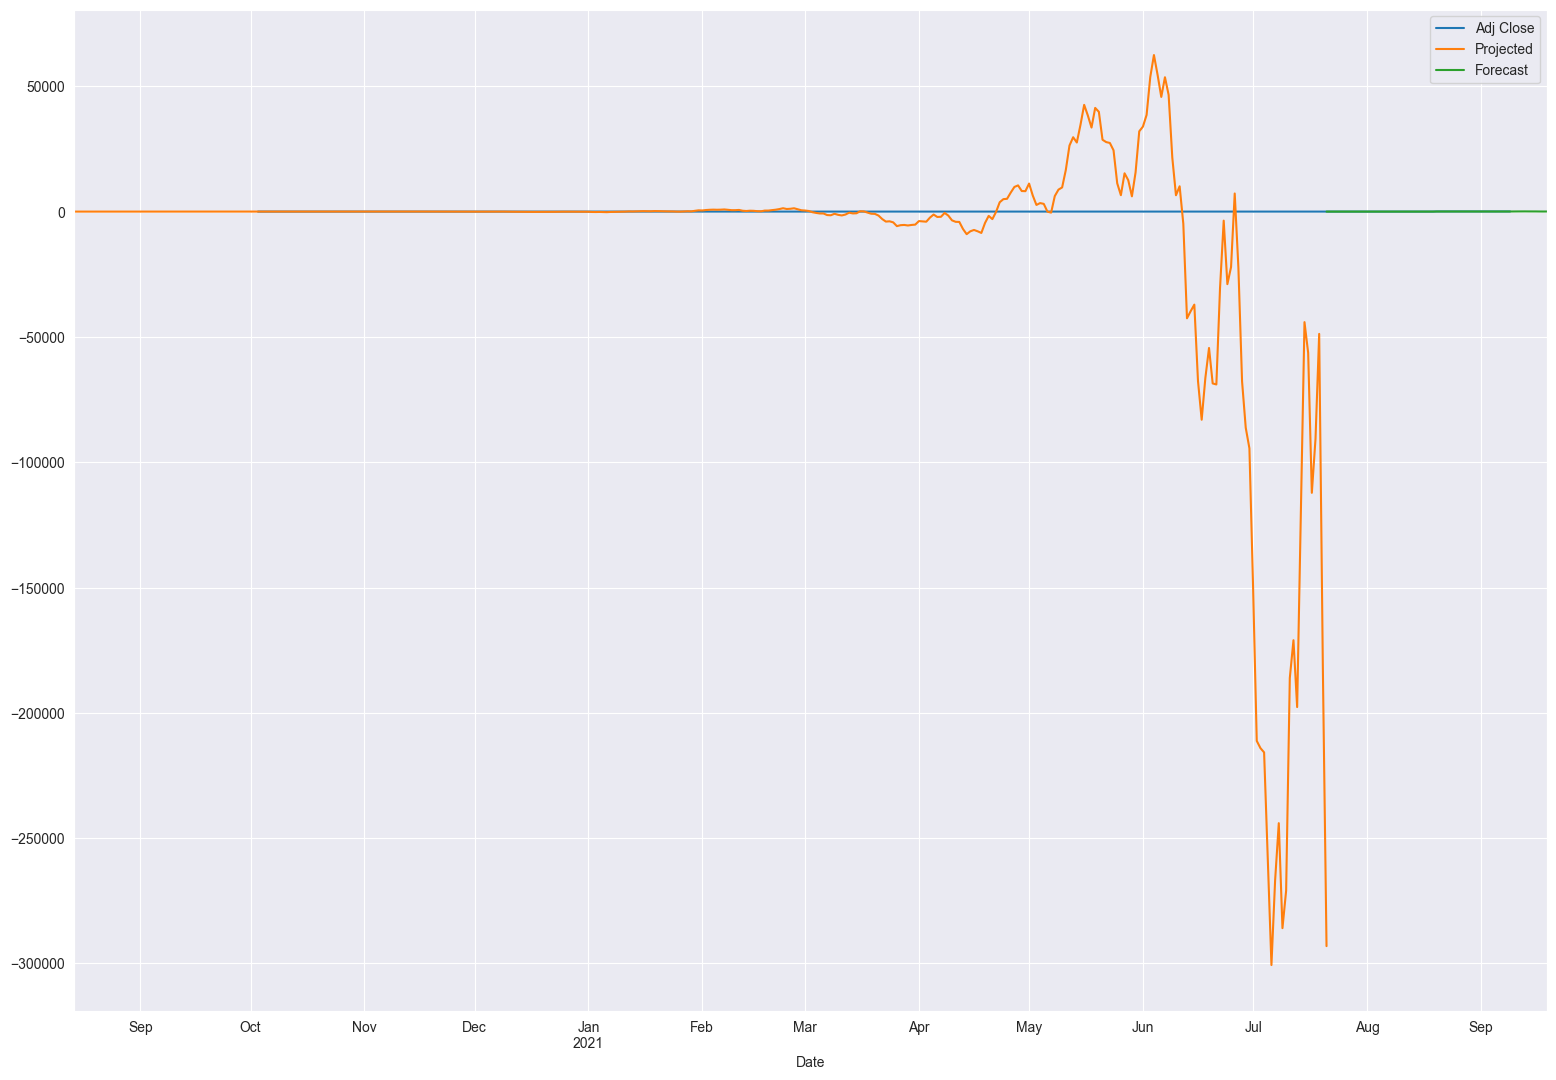

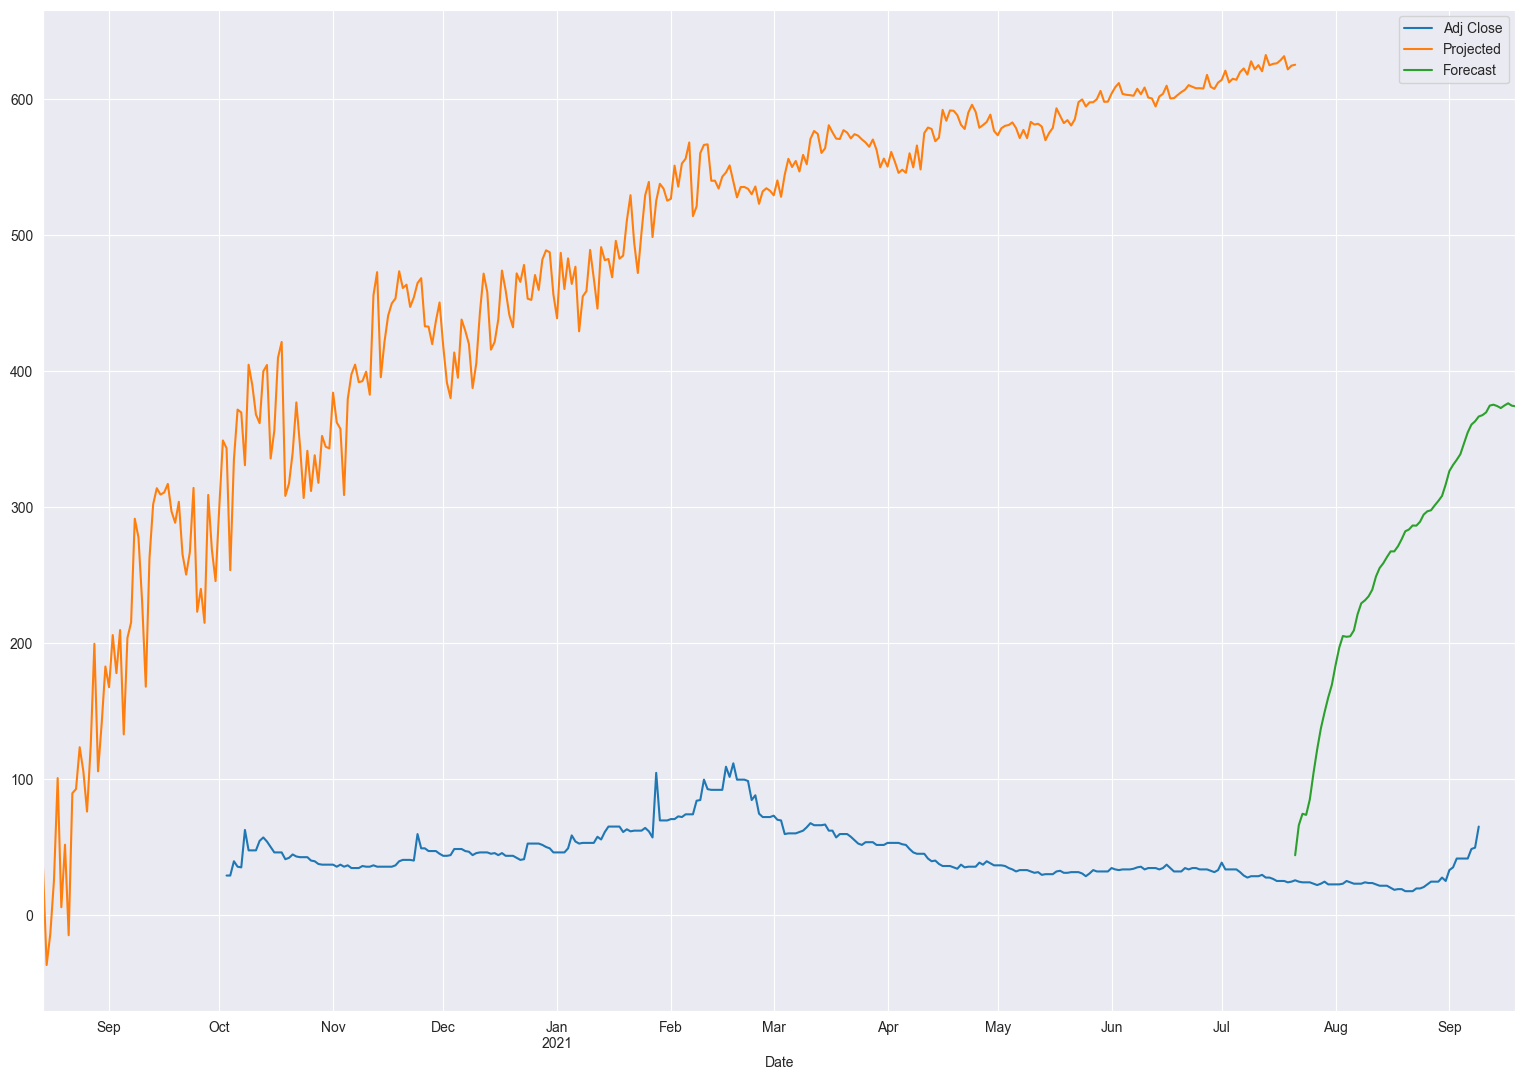

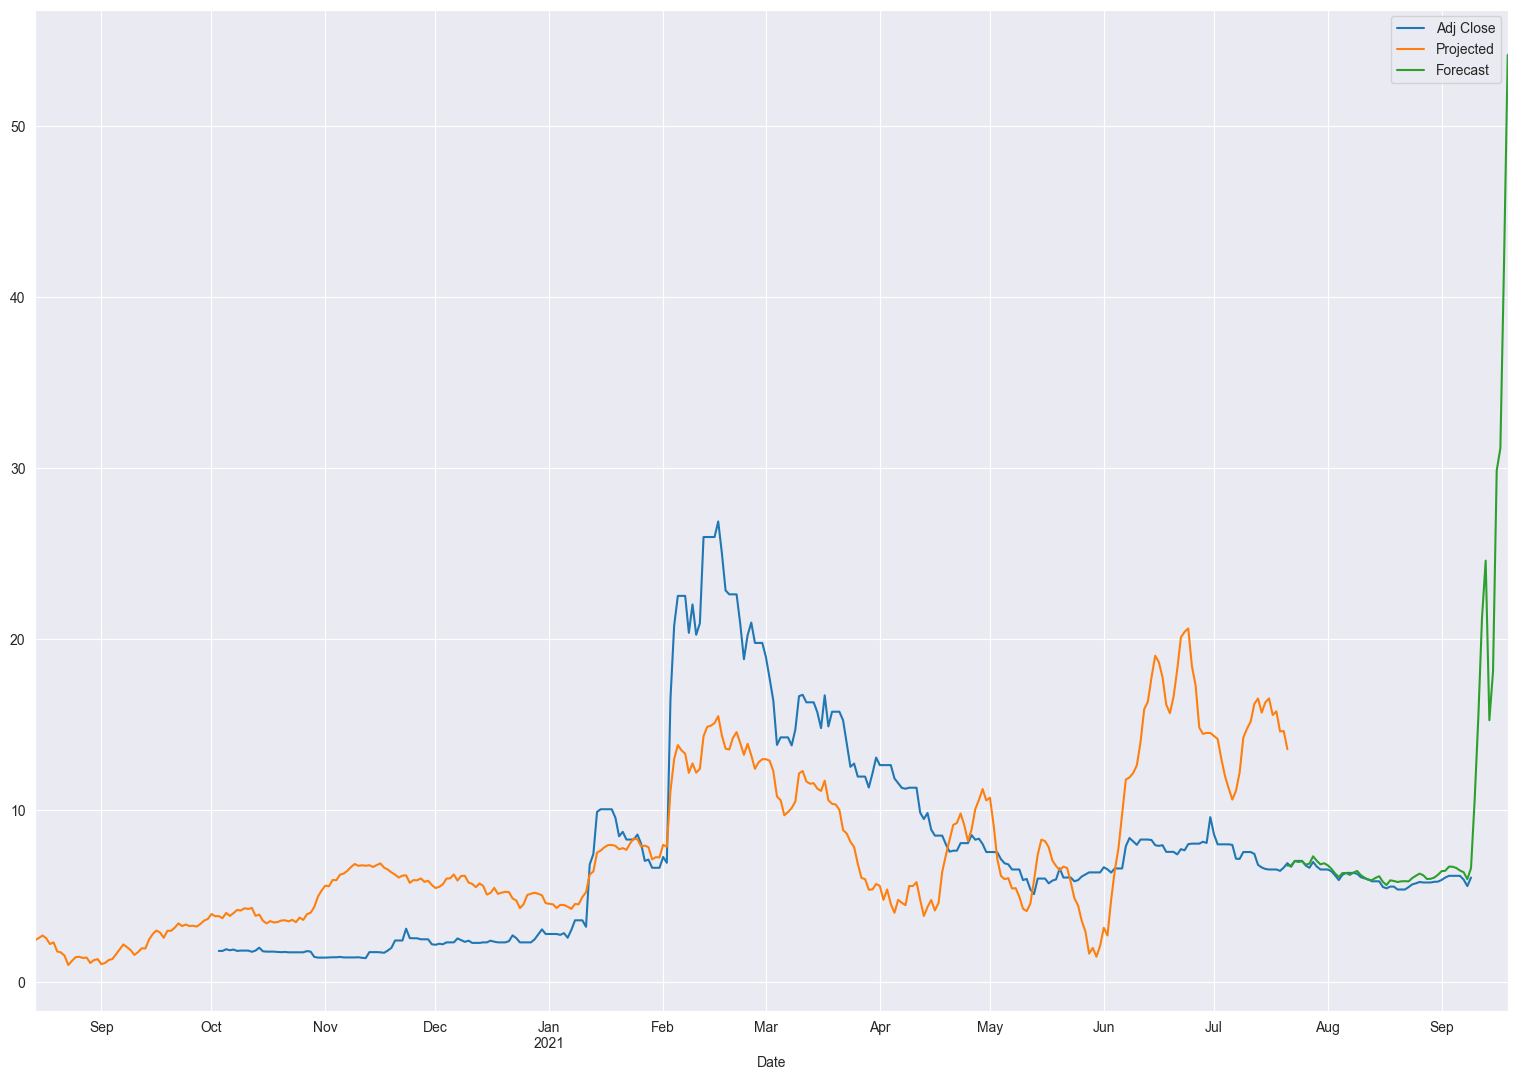

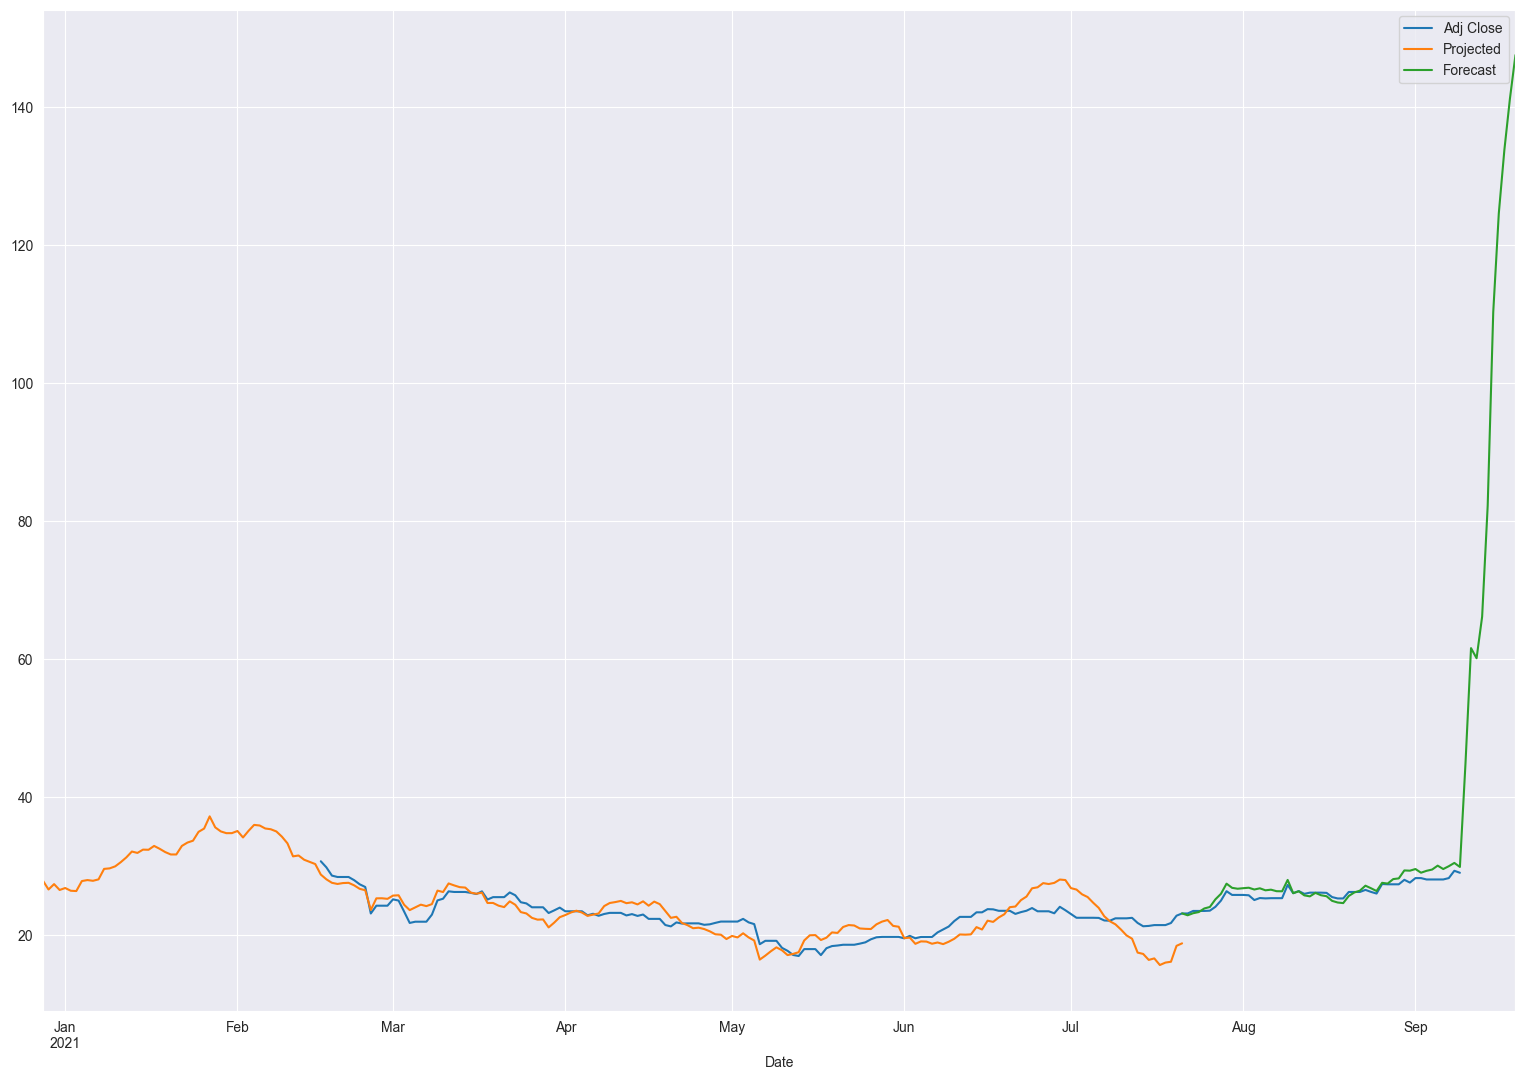

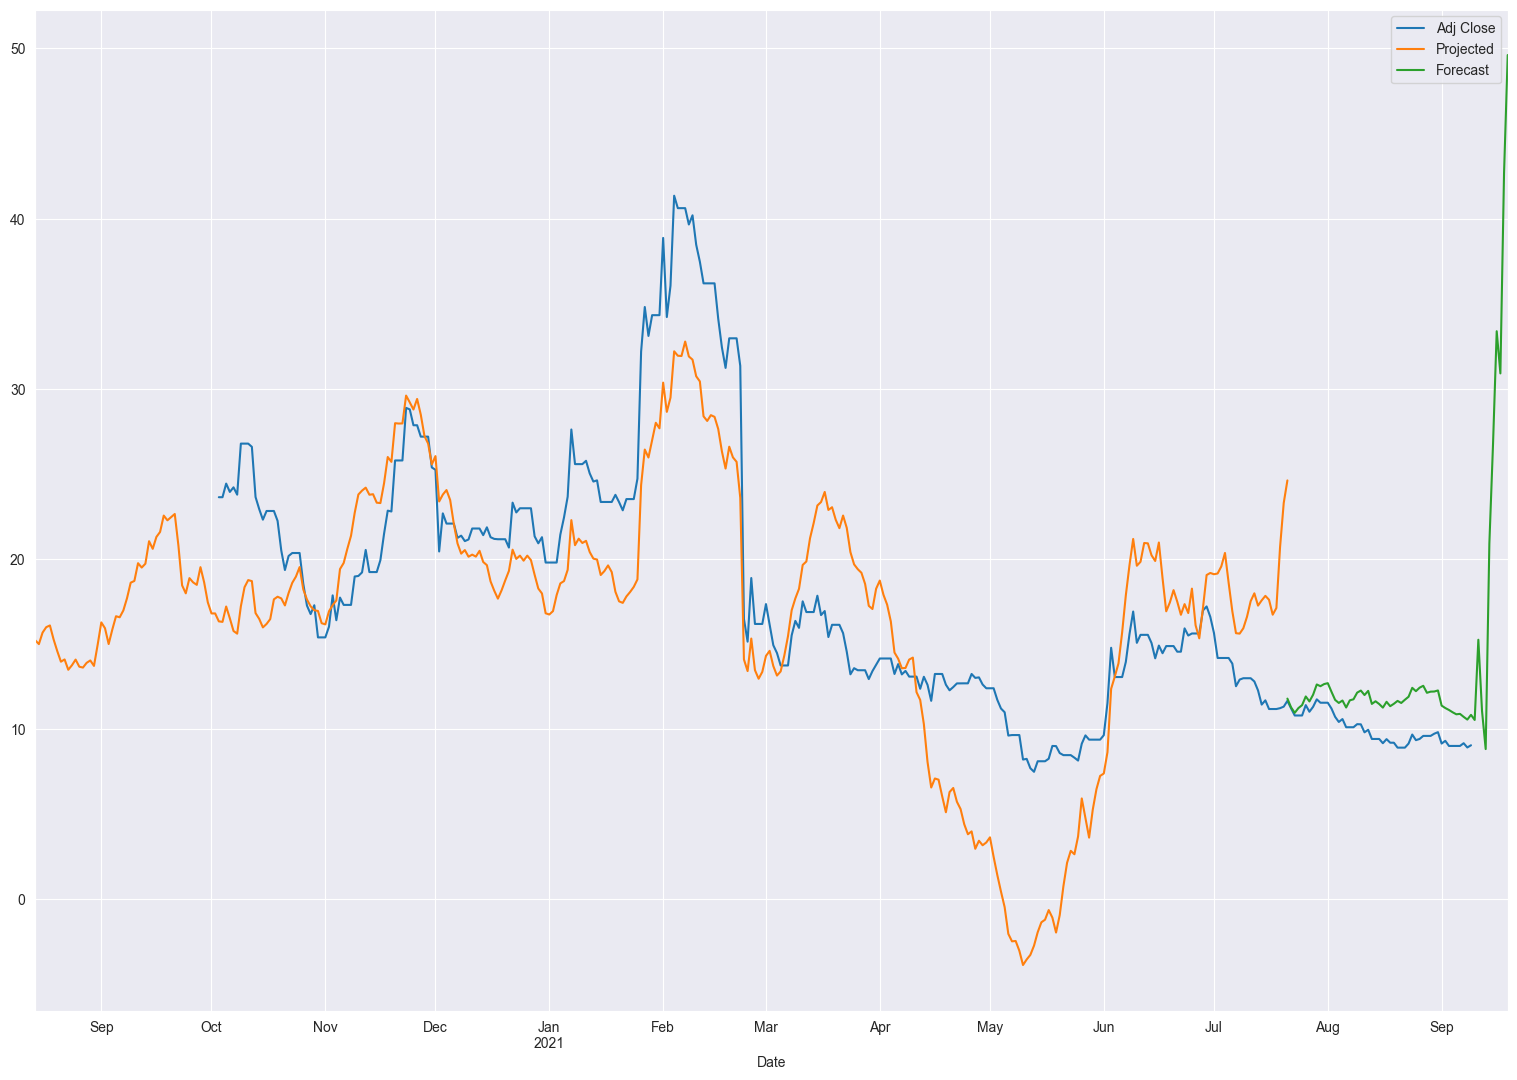

In [42]:
for x in best_proj_roi_df['Ticker']:
    print('Working on: ', x)
    calc_projected_roi_plot(x)